# Telecom Churn Case Study

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# To display maximum rows

pd.set_option('display.max_rows', None)

### Loading the dataset

In [4]:
# Load the Dataset 

df = pd.read_csv('telecom_churn_data.csv')

## Data Understanding 

In [5]:
# To Get a short preview of the loaded dataset

df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [6]:
# To get the shape of the Dataset

df.shape

(99999, 226)

In [7]:
# Numerical Description of the Dataset 

df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


In [8]:
# To get the Information about the dataset columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [9]:
# To get the list of columns

df.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)

In [10]:
# Creating seperate Lists by types of columns

id_cols = ['mobile_number', 'circle_id']
date_cols = ['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9']
cat_cols =  ['night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9','fb_user_6','fb_user_7','fb_user_8','fb_user_9']
num_cols = [column for column in df.columns if column not in id_cols + date_cols + cat_cols]

## Handling missing values

In [11]:
# To check the umber of Unique values in every column of the dataset

df.nunique()

mobile_number               99999
circle_id                       1
loc_og_t2o_mou                  1
std_og_t2o_mou                  1
loc_ic_t2o_mou                  1
last_date_of_month_6            1
last_date_of_month_7            1
last_date_of_month_8            1
last_date_of_month_9            1
arpu_6                      85681
arpu_7                      85308
arpu_8                      83615
arpu_9                      79937
onnet_mou_6                 24313
onnet_mou_7                 24336
onnet_mou_8                 24089
onnet_mou_9                 23565
offnet_mou_6                31140
offnet_mou_7                31023
offnet_mou_8                30908
offnet_mou_9                30077
roam_ic_mou_6                6512
roam_ic_mou_7                5230
roam_ic_mou_8                5315
roam_ic_mou_9                4827
roam_og_mou_6                8038
roam_og_mou_7                6639
roam_og_mou_8                6504
roam_og_mou_9                5882
loc_og_t2t_mou

In [12]:
# To get the null values in the Dataset

round(df.isnull().sum().sort_values(ascending=False)/len(df.index)*100,2)

count_rech_2g_6             74.85
date_of_last_rech_data_6    74.85
count_rech_3g_6             74.85
av_rech_amt_data_6          74.85
max_rech_data_6             74.85
total_rech_data_6           74.85
arpu_3g_6                   74.85
arpu_2g_6                   74.85
night_pck_user_6            74.85
fb_user_6                   74.85
arpu_3g_7                   74.43
count_rech_2g_7             74.43
fb_user_7                   74.43
count_rech_3g_7             74.43
arpu_2g_7                   74.43
av_rech_amt_data_7          74.43
max_rech_data_7             74.43
night_pck_user_7            74.43
total_rech_data_7           74.43
date_of_last_rech_data_7    74.43
night_pck_user_9            74.08
date_of_last_rech_data_9    74.08
fb_user_9                   74.08
arpu_2g_9                   74.08
max_rech_data_9             74.08
arpu_3g_9                   74.08
total_rech_data_9           74.08
av_rech_amt_data_9          74.08
count_rech_3g_9             74.08
count_rech_2g_

In [13]:
# Recharge Columns

rch_df=df.columns[df.columns.str.contains('rech')]
rch_df

Index(['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7',
       'total_rech_amt_8', 'total_rech_amt_9', 'max_rech_amt_6',
       'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_amt_9',
       'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
       'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_2g_9', 'count_rech_3g_6', 'count_rech_3g_7',
       'count_rech_3g_8', 'count_rech_3g_9', 'av_rech_amt_data_6',
       'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9'],
      dtype='object')

In [14]:
# Describe recharge columns

df[rch_df].describe()

,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,...,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,...,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000,25153.000000,25571.000000,26339.000000,25922.000000
mean,7.558806,7.700367,7.212912,6.893019,327.514615,322.962970,324.157122,303.345673,104.637486,104.752398,...,2.016288,1.781807,0.599133,0.621720,0.635711,0.659363,192.600982,200.981292,197.526489,192.734315
std,7.078405,7.070422,7.203753,7.096261,398.019701,408.114237,416.540455,404.588583,120.614894,124.523970,...,2.720132,2.214701,1.274428,1.394524,1.422827,1.411513,192.646318,196.791224,191.301305,188.400286
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.500000,1.000000
25%,3.000000,3.000000,3.000000,3.000000,109.000000,100.000000,90.000000,52.000000,30.000000,30.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,82.000000,92.000000,87.000000,69.000000
50%,6.000000,6.000000,5.000000,5.000000,230.000000,220.000000,225.000000,200.000000,110.000000,110.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,154.000000,154.000000,154.000000,164.000000
75%,9.000000,10.000000,9.000000,9.000000,437.500000,428.000000,434.500000,415.000000,120.000000,128.000000,...,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,252.000000,252.000000,252.000000,252.000000
max,307.000000,138.000000,196.000000,131.000000,35190.000000,40335.000000,45320.000000,37235.000000,4010.000000,4010.000000,...,44.000000,40.000000,29.000000,35.000000,45.000000,49.000000,7546.000000,4365.000000,4076.000000,4061.000000


In [15]:
# Null Values

df[rch_df].isnull().sum()

total_rech_num_6                0
total_rech_num_7                0
total_rech_num_8                0
total_rech_num_9                0
total_rech_amt_6                0
total_rech_amt_7                0
total_rech_amt_8                0
total_rech_amt_9                0
max_rech_amt_6                  0
max_rech_amt_7                  0
max_rech_amt_8                  0
max_rech_amt_9                  0
date_of_last_rech_6          1607
date_of_last_rech_7          1767
date_of_last_rech_8          3622
date_of_last_rech_9          4760
date_of_last_rech_data_6    74846
date_of_last_rech_data_7    74428
date_of_last_rech_data_8    73660
date_of_last_rech_data_9    74077
total_rech_data_6           74846
total_rech_data_7           74428
total_rech_data_8           73660
total_rech_data_9           74077
max_rech_data_6             74846
max_rech_data_7             74428
max_rech_data_8             73660
max_rech_data_9             74077
count_rech_2g_6             74846
count_rech_2g_

In [16]:
# Recharge Data and date of recharge for month_6

df.loc[df.total_rech_data_6.isnull() & df.date_of_last_rech_data_6.isnull(),\
          ["total_rech_data_6", "date_of_last_rech_data_6"]].head(10)

,total_rech_data_6,date_of_last_rech_data_6
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN
10,NaN,NaN
11,NaN,NaN


In [17]:
# Recharge Data and date of recharge for month_7

df.loc[df.total_rech_data_7.isnull() & df.date_of_last_rech_data_7.isnull(),\
          ["total_rech_data_7", "date_of_last_rech_data_7"]].head(10)

,total_rech_data_7,date_of_last_rech_data_7
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
10,NaN,NaN
11,NaN,NaN
12,NaN,NaN
13,NaN,NaN


### The recharge date and the recharge value are missing,
### Hence the customer may not have done the recharge.

## Imputing With Suitable Values

In [18]:
#Creating a list to impute with zero

zero_impute_rch = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9']

In [19]:
# Impute the missing values with 0

df[zero_impute_rch] = df[zero_impute_rch].apply(lambda x: x.fillna(0))

In [20]:
# Null values

df[rch_df].isnull().sum()

total_rech_num_6                0
total_rech_num_7                0
total_rech_num_8                0
total_rech_num_9                0
total_rech_amt_6                0
total_rech_amt_7                0
total_rech_amt_8                0
total_rech_amt_9                0
max_rech_amt_6                  0
max_rech_amt_7                  0
max_rech_amt_8                  0
max_rech_amt_9                  0
date_of_last_rech_6          1607
date_of_last_rech_7          1767
date_of_last_rech_8          3622
date_of_last_rech_9          4760
date_of_last_rech_data_6    74846
date_of_last_rech_data_7    74428
date_of_last_rech_data_8    73660
date_of_last_rech_data_9    74077
total_rech_data_6               0
total_rech_data_7               0
total_rech_data_8               0
total_rech_data_9               0
max_rech_data_6                 0
max_rech_data_7                 0
max_rech_data_8                 0
max_rech_data_9                 0
count_rech_2g_6             74846
count_rech_2g_

In [21]:
# To Drop the Id and Date columns

df = df.drop(id_cols + date_cols, axis=1)
df.shape

(99999, 212)

### Droping the variables with more than a given threshold of missing values

In [22]:
# Checking the Null Values

round(df.isnull().sum().sort_values(ascending=False)/len(df.index)*100,2)

count_rech_2g_6       74.85
arpu_3g_6             74.85
count_rech_3g_6       74.85
night_pck_user_6      74.85
fb_user_6             74.85
arpu_2g_6             74.85
night_pck_user_7      74.43
count_rech_3g_7       74.43
fb_user_7             74.43
arpu_2g_7             74.43
count_rech_2g_7       74.43
arpu_3g_7             74.43
arpu_2g_9             74.08
arpu_3g_9             74.08
count_rech_3g_9       74.08
night_pck_user_9      74.08
count_rech_2g_9       74.08
fb_user_9             74.08
arpu_3g_8             73.66
count_rech_2g_8       73.66
arpu_2g_8             73.66
fb_user_8             73.66
count_rech_3g_8       73.66
night_pck_user_8      73.66
loc_og_t2c_mou_9       7.75
std_og_t2m_mou_9       7.75
loc_og_mou_9           7.75
loc_og_t2f_mou_9       7.75
og_others_9            7.75
isd_og_mou_9           7.75
loc_ic_t2t_mou_9       7.75
loc_ic_t2m_mou_9       7.75
loc_ic_t2f_mou_9       7.75
loc_ic_mou_9           7.75
std_ic_t2t_mou_9       7.75
std_ic_t2m_mou_9    

In [23]:
# Imputing 

df[cat_cols] = df[cat_cols].apply(lambda x: x.fillna(-1))

In [24]:
cols = df.columns

In [25]:
# To Drop the columns with null values greater than a threshold

for i in cols:
    if ((df[i].isnull().sum()/len(df.index)*100) >= 70) :
        df.drop(i , axis = 1, inplace = True)
        
        

In [26]:
# Null values

round(df.isnull().sum().sort_values(ascending=False)/len(df.index)*100,2) 

std_og_mou_9          7.75
ic_others_9           7.75
std_ic_mou_9          7.75
spl_og_mou_9          7.75
loc_og_t2m_mou_9      7.75
spl_ic_mou_9          7.75
isd_ic_mou_9          7.75
loc_og_t2f_mou_9      7.75
isd_og_mou_9          7.75
roam_og_mou_9         7.75
loc_og_t2c_mou_9      7.75
og_others_9           7.75
loc_og_mou_9          7.75
std_og_t2c_mou_9      7.75
std_og_t2f_mou_9      7.75
std_og_t2t_mou_9      7.75
std_ic_t2o_mou_9      7.75
loc_og_t2t_mou_9      7.75
std_og_t2m_mou_9      7.75
std_ic_t2t_mou_9      7.75
loc_ic_t2f_mou_9      7.75
std_ic_t2f_mou_9      7.75
loc_ic_mou_9          7.75
offnet_mou_9          7.75
loc_ic_t2m_mou_9      7.75
std_ic_t2m_mou_9      7.75
loc_ic_t2t_mou_9      7.75
roam_ic_mou_9         7.75
onnet_mou_9           7.75
std_og_t2c_mou_8      5.38
loc_ic_t2m_mou_8      5.38
isd_og_mou_8          5.38
std_og_mou_8          5.38
loc_ic_t2t_mou_8      5.38
loc_ic_t2f_mou_8      5.38
std_og_t2f_mou_8      5.38
std_ic_t2o_mou_8      5.38
l

In [27]:
# Imputing

df[df.select_dtypes(exclude=['datetime64[ns]','category']).columns.tolist()] = df[df.select_dtypes(exclude=['datetime64[ns]','category']).columns.tolist()].fillna(0, axis=1)

In [28]:
# Null Values

round(df.isnull().sum().sort_values(ascending=False)/len(df.index)*100,2) 

sep_vbc_3g            0.0
og_others_7           0.0
spl_og_mou_9          0.0
spl_og_mou_8          0.0
spl_og_mou_7          0.0
spl_og_mou_6          0.0
isd_og_mou_9          0.0
isd_og_mou_8          0.0
isd_og_mou_7          0.0
isd_og_mou_6          0.0
std_og_mou_9          0.0
std_og_mou_8          0.0
std_og_mou_7          0.0
std_og_mou_6          0.0
std_og_t2c_mou_9      0.0
std_og_t2c_mou_8      0.0
std_og_t2c_mou_7      0.0
std_og_t2c_mou_6      0.0
std_og_t2f_mou_9      0.0
std_og_t2f_mou_8      0.0
std_og_t2f_mou_7      0.0
std_og_t2f_mou_6      0.0
std_og_t2m_mou_9      0.0
og_others_6           0.0
og_others_8           0.0
jun_vbc_3g            0.0
og_others_9           0.0
std_ic_t2t_mou_6      0.0
loc_ic_mou_9          0.0
loc_ic_mou_8          0.0
loc_ic_mou_7          0.0
loc_ic_mou_6          0.0
loc_ic_t2f_mou_9      0.0
loc_ic_t2f_mou_8      0.0
loc_ic_t2f_mou_7      0.0
loc_ic_t2f_mou_6      0.0
loc_ic_t2m_mou_9      0.0
loc_ic_t2m_mou_8      0.0
loc_ic_t2m_m

In [29]:
# To get the shape of the dataset

df.shape

(99999, 196)

### Dropping unique columns

In [30]:
df.nunique().sort_values()

loc_og_t2o_mou            1
std_og_t2c_mou_8          1
std_og_t2c_mou_9          1
std_ic_t2o_mou_9          1
std_ic_t2o_mou_8          1
std_ic_t2o_mou_7          1
std_og_t2c_mou_7          1
std_og_t2c_mou_6          1
std_ic_t2o_mou_6          1
std_og_t2o_mou            1
loc_ic_t2o_mou            1
night_pck_user_8          3
night_pck_user_9          3
fb_user_8                 3
fb_user_9                 3
night_pck_user_7          3
night_pck_user_6          3
fb_user_6                 3
fb_user_7                 3
monthly_2g_9              5
monthly_2g_6              5
monthly_2g_8              6
monthly_2g_7              6
monthly_3g_9             11
monthly_3g_6             12
monthly_3g_8             12
monthly_3g_7             15
sachet_3g_6              25
sachet_3g_9              27
sachet_3g_7              27
sachet_3g_8              29
sachet_2g_9              32
sachet_2g_6              32
sachet_2g_8              34
sachet_2g_7              35
total_rech_data_6   

In [31]:
cols = df.columns

In [32]:
# To drop the columns have only one unique column in the dataset

for i in cols:
    if df[i].nunique() == 1:
        df.drop(i, inplace = True, axis = 1)

In [33]:
df.nunique().sort_values()

night_pck_user_7          3
fb_user_9                 3
fb_user_8                 3
fb_user_7                 3
fb_user_6                 3
night_pck_user_9          3
night_pck_user_8          3
night_pck_user_6          3
monthly_2g_6              5
monthly_2g_9              5
monthly_2g_8              6
monthly_2g_7              6
monthly_3g_9             11
monthly_3g_8             12
monthly_3g_6             12
monthly_3g_7             15
sachet_3g_6              25
sachet_3g_7              27
sachet_3g_9              27
sachet_3g_8              29
sachet_2g_6              32
sachet_2g_9              32
sachet_2g_8              34
sachet_2g_7              35
total_rech_data_9        38
total_rech_data_6        38
total_rech_data_7        43
total_rech_data_8        47
max_rech_data_7          49
max_rech_data_6          49
max_rech_data_8          51
max_rech_data_9          51
spl_ic_mou_6             84
total_rech_num_8         96
total_rech_num_9         97
total_rech_num_7    

In [34]:
df.shape

(99999, 185)

In [35]:
res = df.total_rech_data_6[df.total_rech_data_6.isna()].index != df.av_rech_amt_data_6[df.av_rech_amt_data_6.isna()].index
print('June :', res.any())
res = df.total_rech_data_7[df.total_rech_data_7.isna()].index != df.av_rech_amt_data_7[df.av_rech_amt_data_7.isna()].index
print('July :', res.any())
res =df.total_rech_data_8[df.total_rech_data_8.isna()].index != df.av_rech_amt_data_8[df.av_rech_amt_data_8.isna()].index
print('Aug :', res.any())

June : False
July : False
Aug : False


# To Filter the high-value customers

In [36]:
# Calcuating the Average recharge amount as the sum of total recharge amount and the total data recharge amount

df['total_data_rech_6'] = df.total_rech_data_6 * df.av_rech_amt_data_6
df['total_data_rech_7'] = df.total_rech_data_7 * df.av_rech_amt_data_7

In [37]:
any(df.total_rech_amt_6.isna())

False

In [38]:
any(df.total_rech_amt_7.isna())

False

In [39]:
# To get the Total recharge amount for June and July 

df['amt_data_6'] = df.total_rech_amt_6 + df.total_data_rech_6
df['amt_data_7'] = df.total_rech_amt_7 + df.total_data_rech_7

In [40]:
# Calcuating the Average recharge amount as the sum of total recharge amount and the total data recharge amount

df['av_amt_data_6_7'] = (df.amt_data_6 + df.amt_data_7)/2

In [41]:
# To Get a short preview of the loaded dataset

df.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_6,total_data_rech_7,amt_data_6,amt_data_7,av_amt_data_6_7
0,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.00,...,968,30.4,0.0,101.20,3.58,252.0,252.0,614.0,504.0,559.0
1,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,...,1006,0.0,0.0,0.00,0.00,0.0,154.0,74.0,538.0,306.0
2,167.690,189.058,210.226,290.714,11.54,55.24,37.26,74.81,143.33,220.59,...,1103,0.0,0.0,4.17,0.00,0.0,0.0,168.0,315.0,241.5
3,221.338,251.102,508.054,389.500,99.91,54.39,310.98,241.71,123.31,109.01,...,2491,0.0,0.0,0.00,0.00,0.0,0.0,230.0,310.0,270.0
4,261.636,309.876,238.174,163.426,50.31,149.44,83.89,58.78,76.96,91.88,...,1526,0.0,0.0,0.00,0.00,56.0,0.0,252.0,350.0,301.0


In [42]:
df[['av_amt_data_6_7', 'total_data_rech_6', 'total_data_rech_7', 'amt_data_6', 'amt_data_7']].head()

,av_amt_data_6_7,total_data_rech_6,total_data_rech_7,amt_data_6,amt_data_7
0,559.0,252.0,252.0,614.0,504.0
1,306.0,0.0,154.0,74.0,538.0
2,241.5,0.0,0.0,168.0,315.0
3,270.0,0.0,0.0,230.0,310.0
4,301.0,56.0,0.0,252.0,350.0


In [43]:
# To get the 70th precentile of the average recharge amount of june and july

print("Recharge amount at 70th percentile: {0}".format(df.av_amt_data_6_7.quantile(0.7)))

Recharge amount at 70th percentile: 478.0


In [44]:
#To Check the number of Rows and Columns in the Dataset

df.shape

(99999, 190)

In [45]:
# To get the  High value customers where total average recharge amount for good phase greater than 70th percentile

df_filtered  = df.loc[df.av_amt_data_6_7 > df.av_amt_data_6_7.quantile(0.7), :]
df_filtered  = df_filtered .reset_index(drop=True)
df_filtered .shape

(29953, 190)

 ### After filtering there are (29953, 190) datasets

In [46]:
# To Delete variables created to filter high-value customers

df_filtered = df_filtered.drop(['total_data_rech_6', 'total_data_rech_7',
                                      'amt_data_6', 'amt_data_7', 'av_amt_data_6_7'], axis=1)
df_filtered.shape

(29953, 185)

##  TAG THE CHURN 

###  USING MONTH_9

In [47]:
# TO calculate the total ic and og consumption of month 9

df_filtered['total_calls_mou_9'] = df_filtered.total_ic_mou_9 + df_filtered.total_og_mou_9


In [48]:
# TO calculate the total 2g and 3g consumption of month 9

df_filtered['total_internet_mb_9'] =  df_filtered.vol_2g_mb_9 + df_filtered.vol_3g_mb_9

In [49]:
# Churn for month 9
df_filtered['churn'] = df_filtered.apply(lambda row: 1 if (row.total_calls_mou_9 == 0 and row.total_internet_mb_9 == 0) else 0, axis=1)

In [50]:
# drop the derived variables

df_filtered = df_filtered.drop(['total_calls_mou_9', 'total_internet_mb_9'], axis=1)

In [51]:
# change data type to category

df_filtered.churn = df_filtered.churn.astype("category")

# To get churn ratio
print("Churn Ratio:")
print(df_filtered.churn.value_counts()*100/df_filtered.shape[0])

Churn Ratio:
0    91.877274
1     8.122726
Name: churn, dtype: float64


In [52]:
# To calculate the difference between 8th month and the 6th and 7th months

df_filtered['arpu_diff'] = df_filtered.arpu_8 - ((df_filtered.arpu_6 + df_filtered.arpu_7)/2)

df_filtered['onnet_mou_diff'] = df_filtered.onnet_mou_8 - ((df_filtered.onnet_mou_6 + df_filtered.onnet_mou_7)/2)

df_filtered['offnet_mou_diff'] = df_filtered.offnet_mou_8 - ((df_filtered.offnet_mou_6 + df_filtered.offnet_mou_7)/2)

df_filtered['roam_ic_mou_diff'] = df_filtered.roam_ic_mou_8 - ((df_filtered.roam_ic_mou_6 + df_filtered.roam_ic_mou_7)/2)

df_filtered['roam_og_mou_diff'] = df_filtered.roam_og_mou_8 - ((df_filtered.roam_og_mou_6 + df_filtered.roam_og_mou_7)/2)

df_filtered['loc_og_mou_diff'] = df_filtered.loc_og_mou_8 - ((df_filtered.loc_og_mou_6 + df_filtered.loc_og_mou_7)/2)

df_filtered['std_og_mou_diff'] = df_filtered.std_og_mou_8 - ((df_filtered.std_og_mou_6 + df_filtered.std_og_mou_7)/2)

df_filtered['isd_og_mou_diff'] = df_filtered.isd_og_mou_8 - ((df_filtered.isd_og_mou_6 + df_filtered.isd_og_mou_7)/2)

df_filtered['spl_og_mou_diff'] = df_filtered.spl_og_mou_8 - ((df_filtered.spl_og_mou_6 + df_filtered.spl_og_mou_7)/2)

df_filtered['total_og_mou_diff'] = df_filtered.total_og_mou_8 - ((df_filtered.total_og_mou_6 + df_filtered.total_og_mou_7)/2)

df_filtered['loc_ic_mou_diff'] = df_filtered.loc_ic_mou_8 - ((df_filtered.loc_ic_mou_6 + df_filtered.loc_ic_mou_7)/2)

df_filtered['std_ic_mou_diff'] = df_filtered.std_ic_mou_8 - ((df_filtered.std_ic_mou_6 + df_filtered.std_ic_mou_7)/2)

df_filtered['isd_ic_mou_diff'] = df_filtered.isd_ic_mou_8 - ((df_filtered.isd_ic_mou_6 + df_filtered.isd_ic_mou_7)/2)

df_filtered['spl_ic_mou_diff'] = df_filtered.spl_ic_mou_8 - ((df_filtered.spl_ic_mou_6 + df_filtered.spl_ic_mou_7)/2)

df_filtered['total_ic_mou_diff'] = df_filtered.total_ic_mou_8 - ((df_filtered.total_ic_mou_6 + df_filtered.total_ic_mou_7)/2)

df_filtered['total_rech_num_diff'] = df_filtered.total_rech_num_8 - ((df_filtered.total_rech_num_6 + df_filtered.total_rech_num_7)/2)

df_filtered['total_rech_amt_diff'] = df_filtered.total_rech_amt_8 - ((df_filtered.total_rech_amt_6 + df_filtered.total_rech_amt_7)/2)

df_filtered['max_rech_amt_diff'] = df_filtered.max_rech_amt_8 - ((df_filtered.max_rech_amt_6 + df_filtered.max_rech_amt_7)/2)

df_filtered['total_rech_data_diff'] = df_filtered.total_rech_data_8 - ((df_filtered.total_rech_data_6 + df_filtered.total_rech_data_7)/2)

df_filtered['max_rech_data_diff'] = df_filtered.max_rech_data_8 - ((df_filtered.max_rech_data_6 + df_filtered.max_rech_data_7)/2)

df_filtered['av_rech_amt_data_diff'] = df_filtered.av_rech_amt_data_8 - ((df_filtered.av_rech_amt_data_6 + df_filtered.av_rech_amt_data_7)/2)

df_filtered['vol_2g_mb_diff'] = df_filtered.vol_2g_mb_8 - ((df_filtered.vol_2g_mb_6 + df_filtered.vol_2g_mb_7)/2)

df_filtered['vol_3g_mb_diff'] = df_filtered.vol_3g_mb_8 - ((df_filtered.vol_3g_mb_6 + df_filtered.vol_3g_mb_7)/2)


In [53]:
# To get the summary of one of the difference variables

df_filtered['total_og_mou_diff'].describe()

count    29953.000000
mean       -67.461292
std        502.520398
min      -7213.410000
25%       -167.865000
50%        -14.625000
75%         67.915000
max      12768.705000
Name: total_og_mou_diff, dtype: float64

## Deleting the columns with 9th month

In [54]:
# delete all variables relating to 9th month

df_filtered = df_filtered.filter(regex='[^9]$', axis=1)
df_filtered.shape

(29953, 164)

In [55]:
# extract all names that end with 9

col_9_names = df.filter(regex='9$', axis=1).columns

# update num_cols and cat_cols column name list

cat_cols = [col for col in cat_cols if col not in col_9_names]
cat_cols.append('churn')
num_cols = [col for col in df_filtered.columns if col not in cat_cols]

In [56]:
df_missing_columns = (round(((df_filtered .isnull().sum()/len(df_filtered .index))*100),2).to_frame('null')).sort_values('null', ascending=False)
df_missing_columns

,null
arpu_6,0.0
total_rech_data_7,0.0
max_rech_data_6,0.0
max_rech_data_7,0.0
max_rech_data_8,0.0
av_rech_amt_data_6,0.0
av_rech_amt_data_7,0.0
av_rech_amt_data_8,0.0
vol_2g_mb_6,0.0
vol_2g_mb_7,0.0


In [57]:
df_filtered.shape

(29953, 164)

In [58]:
# change columns types

df_filtered[num_cols] = df_filtered[num_cols].apply(pd.to_numeric)
df_filtered[cat_cols] = df_filtered[cat_cols].apply(lambda column: column.astype("category"), axis=0)

# EDA

count    99999.000000
mean       282.987358
std        328.439770
min      -2258.709000
25%         93.411500
50%        197.704000
75%        371.060000
max      27731.088000
Name: arpu_6, dtype: float64


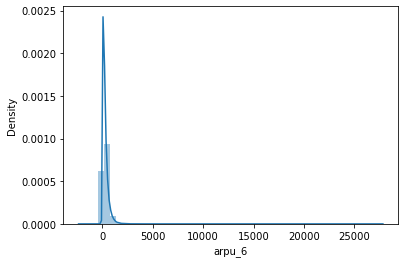

In [59]:
# Distplot

sns.distplot(df["arpu_6"])
print(df["arpu_6"].describe())

count    99999.000000
mean       278.536648
std        338.156291
min      -2014.045000
25%         86.980500
50%        191.640000
75%        365.344500
max      35145.834000
Name: arpu_7, dtype: float64


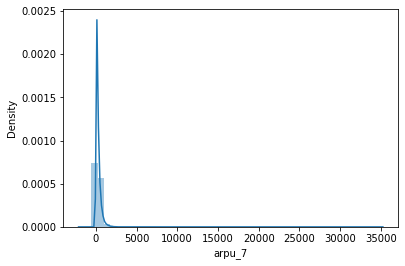

In [60]:
# Distplot

sns.distplot(df["arpu_7"])
print(df["arpu_7"].describe())

count    99999.000000
mean       279.154731
std        344.474791
min       -945.808000
25%         84.126000
50%        192.080000
75%        369.370500
max      33543.624000
Name: arpu_8, dtype: float64


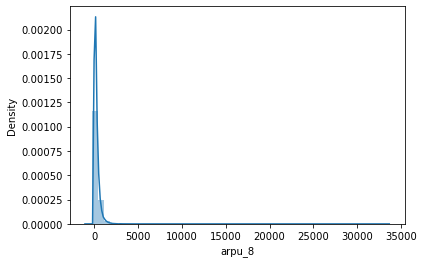

In [61]:
#plot

sns.distplot(df["arpu_8"])
print(df["arpu_8"].describe())

count    99999.000000
mean       125.864313
std        302.023240
min          0.000000
25%          4.090000
50%         28.040000
75%        106.740000
max      10752.560000
Name: onnet_mou_8, dtype: float64


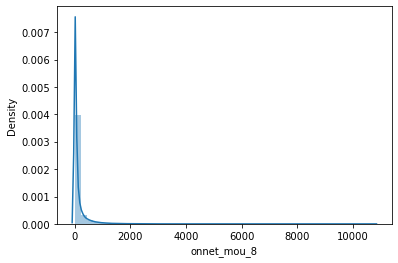

In [62]:
# Plot

sns.distplot(df['onnet_mou_8'])
print(df["onnet_mou_8"].describe())

count    99999.000000
mean       186.002904
std        321.325854
min          0.000000
25%         23.840000
50%         83.130000
75%        215.500000
max      14007.340000
Name: offnet_mou_8, dtype: float64


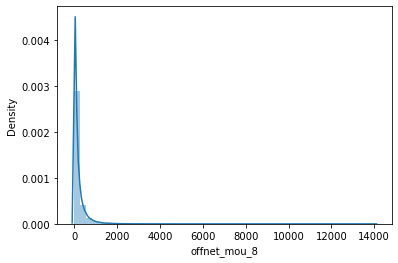

In [63]:
# Plot

sns.distplot(df['offnet_mou_8'])
print(df["offnet_mou_8"].describe())

count    99999.000000
mean       120.210311
std        298.331154
min          0.000000
25%          2.190000
50%         23.840000
75%         99.090000
max      10427.460000
Name: onnet_mou_9, dtype: float64


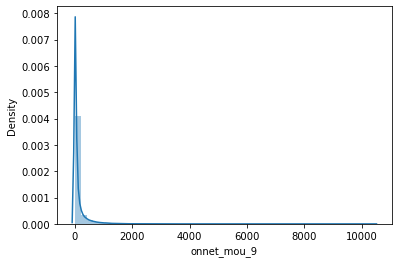

In [64]:
# Plot

sns.distplot(df['onnet_mou_9'])
print(df["onnet_mou_9"].describe())

count    99999.000000
mean       175.595457
std        310.968398
min          0.000000
25%         16.030000
50%         74.680000
75%        202.830000
max      10310.760000
Name: offnet_mou_9, dtype: float64


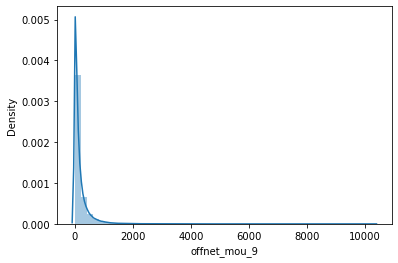

In [65]:
# Plot

sns.distplot(df['offnet_mou_9'])
print(df["offnet_mou_9"].describe())

count    99999.000000
mean       175.595457
std        310.968398
min          0.000000
25%         16.030000
50%         74.680000
75%        202.830000
max      10310.760000
Name: offnet_mou_9, dtype: float64


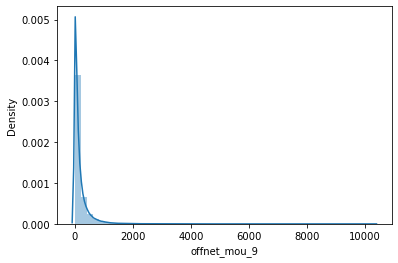

In [66]:
# Plot

sns.distplot(df['offnet_mou_9'])
print(df["offnet_mou_9"].describe())

count    99999.000000
mean         0.619726
std          1.760541
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         61.000000
Name: total_rech_data_6, dtype: float64


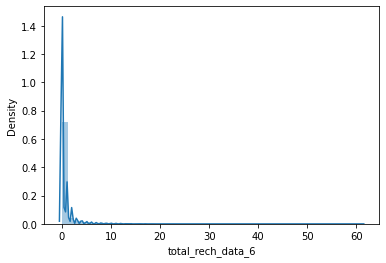

In [67]:
# Plot

sns.distplot(df['total_rech_data_6'])
print(df["total_rech_data_6"].describe())

count    99999.000000
mean        -0.742157
std          0.451644
min         -1.000000
25%         -1.000000
50%         -1.000000
75%          0.000000
max          1.000000
Name: night_pck_user_6, dtype: float64


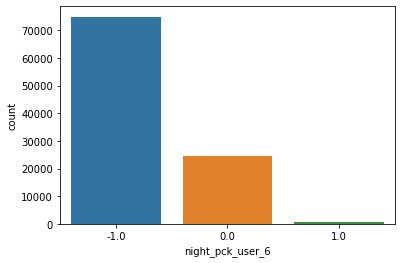

In [68]:
# Countplot 

sns.countplot(df['night_pck_user_6'])
print(df["night_pck_user_6"].describe())

Text(0.5, 1.0, 'churned')

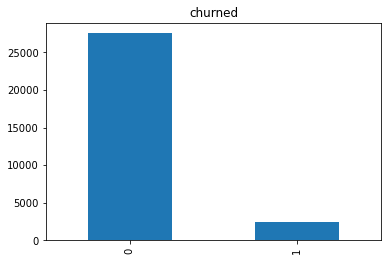

In [69]:
df_filtered['churn'].value_counts().plot(kind='bar').set_title('churned')

<AxesSubplot:xlabel='churn', ylabel='total_rech_amt_8'>

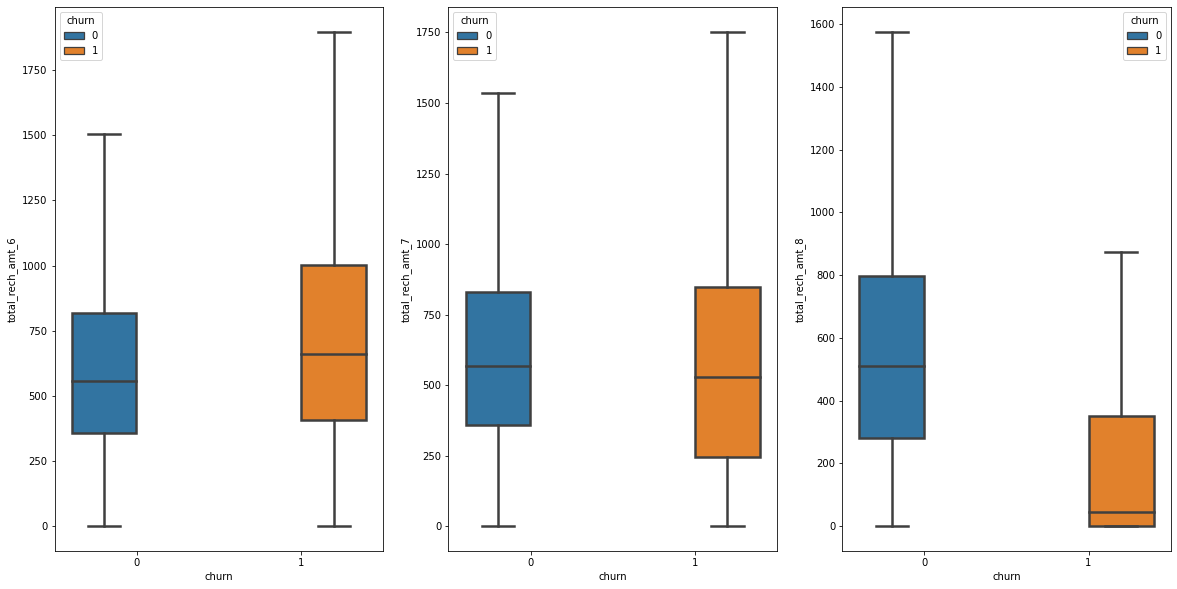

In [70]:
# Boxplot

plt.figure(figsize=(20 ,10))
plt.subplot(1,3,1)
sns.boxplot(data=df_filtered, y='total_rech_amt_6' , x = "churn", hue="churn", linewidth=2.5, showfliers=False)
plt.subplot(1,3,2)
sns.boxplot(data=df_filtered, y='total_rech_amt_7' , x = "churn", hue="churn", linewidth=2.5, showfliers=False)
plt.subplot(1,3,3)
sns.boxplot(data=df_filtered, y='total_rech_amt_8' , x = "churn", hue="churn", linewidth=2.5, showfliers=False)

<AxesSubplot:xlabel='churn', ylabel='max_rech_amt_8'>

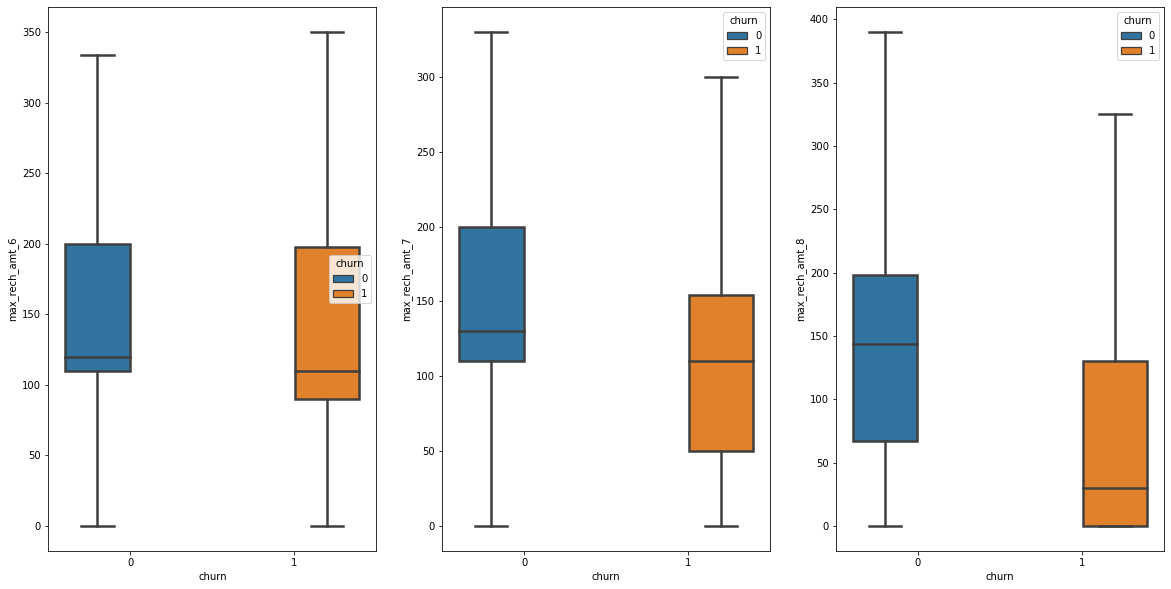

In [71]:
# Boxplot

plt.figure(figsize=(20 ,10))
plt.subplot(1,3,1)
sns.boxplot(data=df_filtered, y='max_rech_amt_6' , x = "churn", hue="churn", linewidth=2.5,showfliers=False)
plt.subplot(1,3,2)
sns.boxplot(data=df_filtered, y='max_rech_amt_7' , x = "churn", hue="churn", linewidth=2.5, showfliers=False)
plt.subplot(1,3,3)
sns.boxplot(data=df_filtered, y='max_rech_amt_8' , x = "churn", hue="churn", linewidth=2.5, showfliers=False)

<AxesSubplot:xlabel='monthly_2g_8', ylabel='count'>

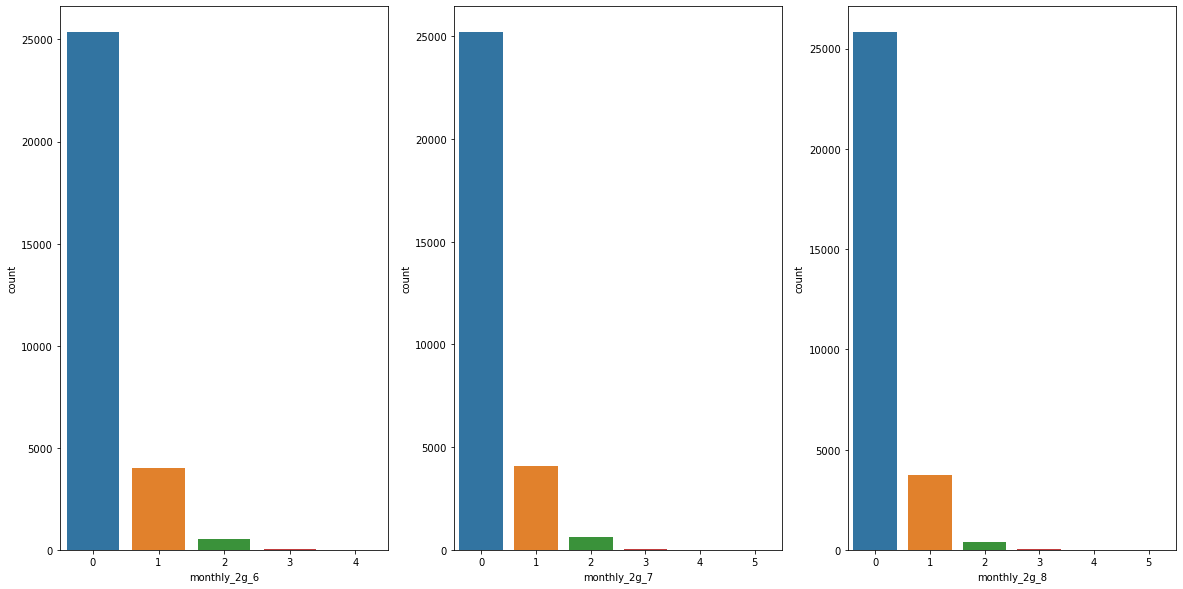

In [72]:
# Countplot 

plt.figure(figsize=(20,10))
plt.subplot(1,3,1)
sns.countplot(df_filtered["monthly_2g_6"])
plt.subplot(1,3,2)
sns.countplot(df_filtered["monthly_2g_7"])
plt.subplot(1,3,3)
sns.countplot(df_filtered["monthly_2g_8"])

In [73]:
import math
def func_bar(*args,data_df_filtered):                        
    m=math.ceil(len(args)/2)  # getting the length of arguments to determine the shape of subplots                   
    fig,axes = plt.subplots(m,2,squeeze=False, figsize = (16, 6*m))
    ax_li = axes.flatten()       # flattening the numpy array returned by subplots
    i=0
    for col in args:
        sns.countplot(x=col, data=data_df_filtered,ax=ax_li[i], order = data_df_filtered[col].value_counts().index)
        ax_li[i].set_title(col)
        ax_li[i].set_yscale('log')
        plt.tight_layout()
        i=i+1

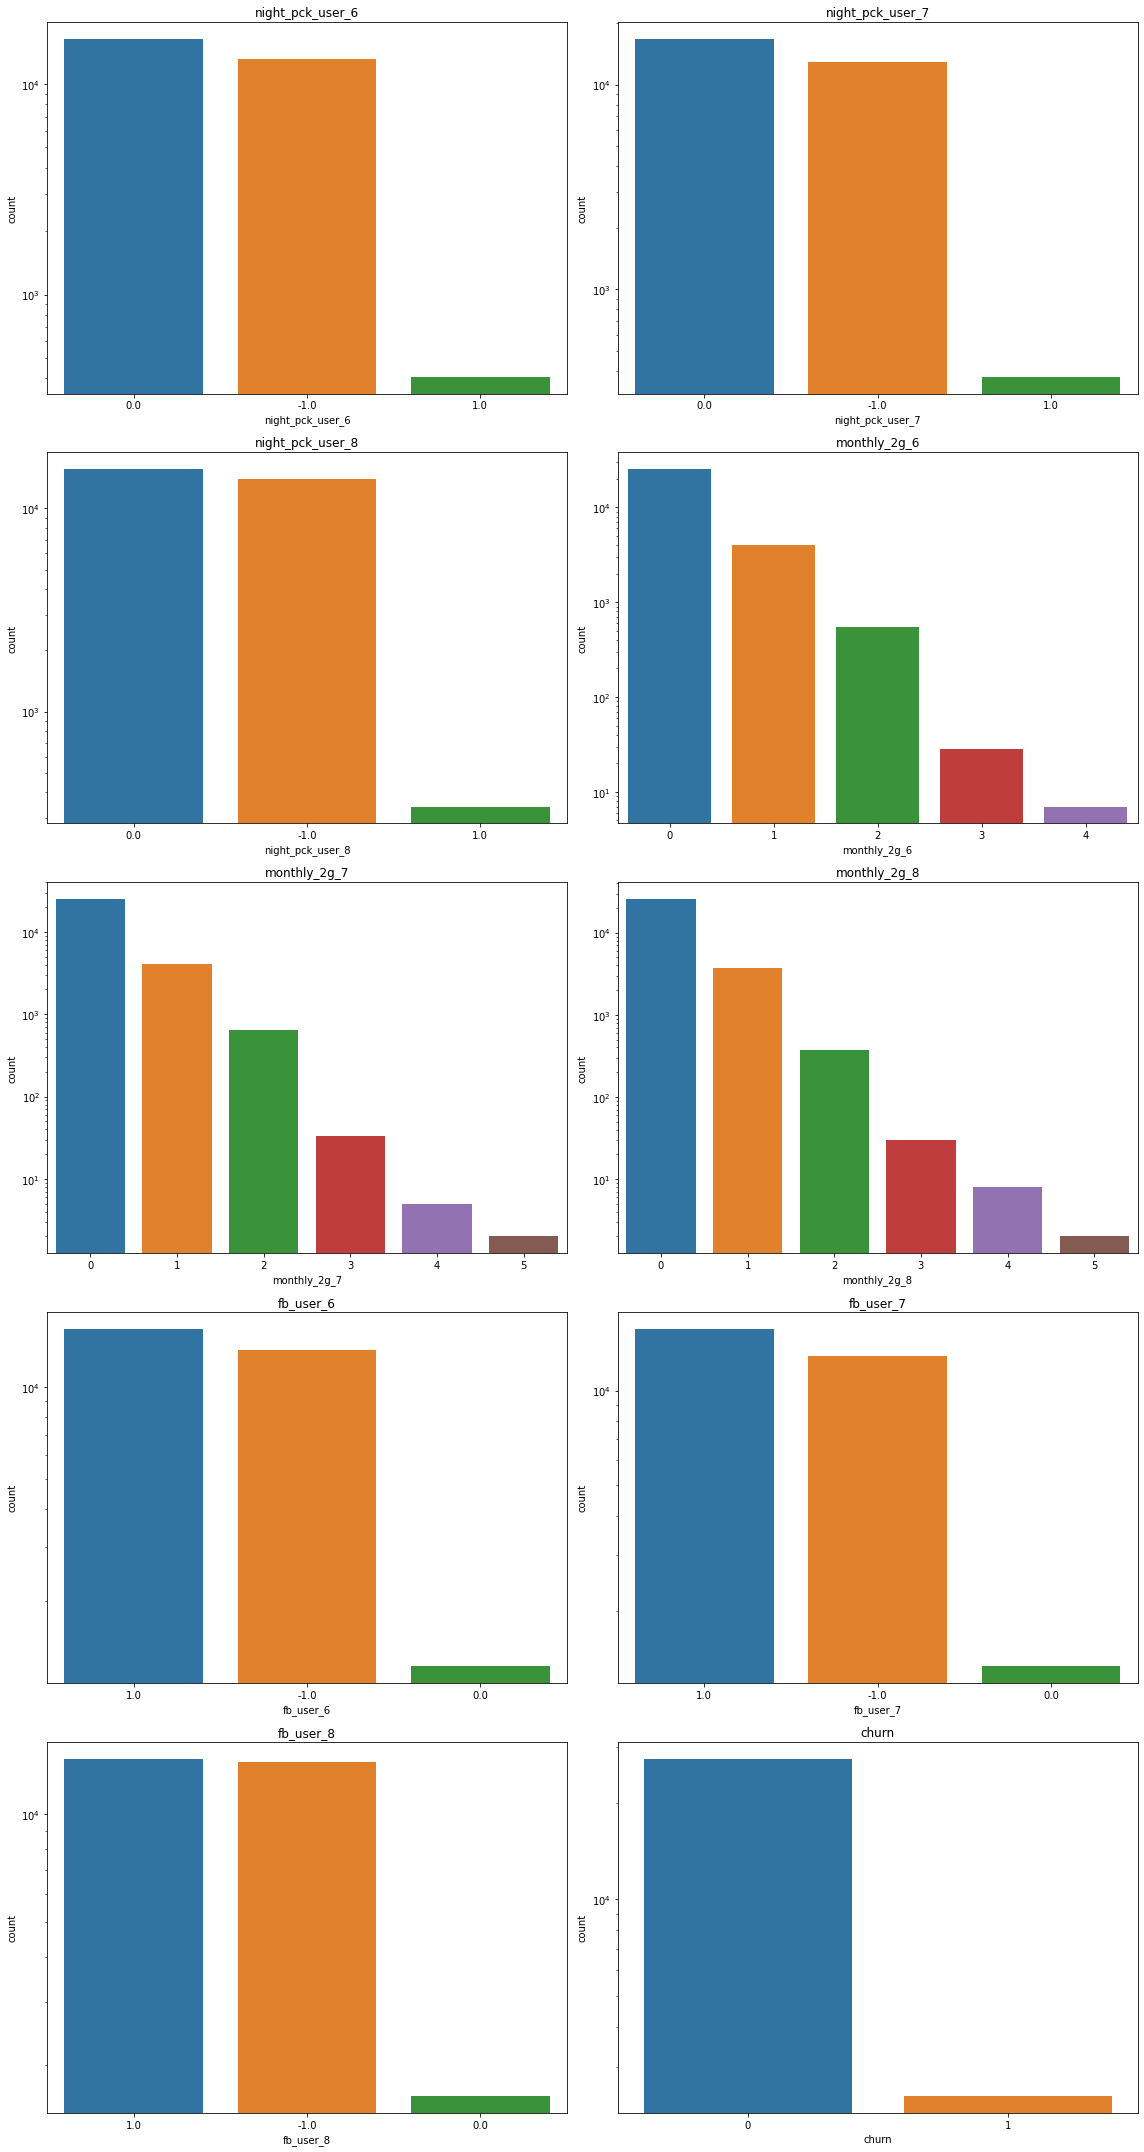

In [74]:
# Plotting Bar chart for data attributes

col_10=df_filtered.columns[df_filtered.nunique()<=10].tolist()  # Selecting columns that have less than 11 unique values for plotting using barchart
func_bar(*col_10,data_df_filtered=df_filtered)

## Capping Outliers

In [75]:
def capping_outliers(array, k=3):
    upper_limit = array.mean() + k*array.std()
    lower_limit = array.mean() - k*array.std()
    array[array<lower_limit] = lower_limit
    array[array>upper_limit] = upper_limit
    return array

In [76]:
# example of capping
sample_array = list(range(100))

# add outliers to the data
sample_array[0] = -9999
sample_array[99] = 9999

# cap outliers
sample_array = np.array(sample_array)
print("Array after capping outliers: \n", capping_outliers(sample_array, k=2))

Array after capping outliers: 
 [-2780     1     2     3     4     5     6     7     8     9    10    11
    12    13    14    15    16    17    18    19    20    21    22    23
    24    25    26    27    28    29    30    31    32    33    34    35
    36    37    38    39    40    41    42    43    44    45    46    47
    48    49    50    51    52    53    54    55    56    57    58    59
    60    61    62    63    64    65    66    67    68    69    70    71
    72    73    74    75    76    77    78    79    80    81    82    83
    84    85    86    87    88    89    90    91    92    93    94    95
    96    97    98  2877]


In [77]:
# cap outliers in the numeric columns
df_filtered[num_cols] = df_filtered[num_cols].apply(capping_outliers, axis=0)

## DATA MODELLING

In [78]:
# changing churn to numeric

df_filtered['churn'] = pd.to_numeric(df_filtered['churn'])

###  SPLITTING THE DATA INTO TRAIN AND TEST

In [79]:
# Importing "train_test_split" from sklearn

from sklearn.model_selection import train_test_split

In [80]:
# Splitting the dataset into Traning and Test

X = df_filtered.drop("churn", axis = 1)
y = df_filtered.churn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 4, stratify = y)

In [81]:
train = pd.concat([X_train, y_train], axis=1)

In [82]:
# aggregate the categorical variables

train.groupby('night_pck_user_6').churn.mean()

night_pck_user_6
-1.0    0.098943
0.0     0.066187
1.0     0.106164
Name: churn, dtype: float64

In [83]:
train.groupby('night_pck_user_7').churn.mean()


night_pck_user_7
-1.0    0.114634
0.0     0.055651
1.0     0.071161
Name: churn, dtype: float64

In [84]:
train.groupby('night_pck_user_8').churn.mean()

night_pck_user_8
-1.0    0.141321
0.0     0.028829
1.0     0.029046
Name: churn, dtype: float64

In [85]:
train.groupby('fb_user_6').churn.mean()

fb_user_6
-1.0    0.098943
0.0     0.069767
1.0     0.066980
Name: churn, dtype: float64

In [86]:
train.groupby('fb_user_7').churn.mean()

fb_user_7
-1.0    0.114634
0.0     0.061834
1.0     0.055500
Name: churn, dtype: float64

In [87]:
train.groupby('fb_user_8').churn.mean()

fb_user_8
-1.0    0.141321
0.0     0.061739
1.0     0.025070
Name: churn, dtype: float64

In [88]:
# replace categories with aggregated values in each categorical column

mapping = {'night_pck_user_6' : {-1: 0.098943, 0: 0.066187, 1: 0.106164},
           'night_pck_user_7' : {-1: 0.114634, 0: 0.055651, 1: 0.071161},
           'night_pck_user_8' : {-1: 0.141321, 0: 0.028829, 1: 0.029046},
           'fb_user_6'        : {-1: 0.098943, 0: 0.069767, 1: 0.066980},
           'fb_user_7'        : {-1: 0.114634, 0: 0.061834, 1: 0.055500},
           'fb_user_8'        : {-1: 0.141321, 0: 0.061739, 1: 0.025070}
          }
X_train.replace(mapping, inplace = True)
X_test.replace(mapping, inplace = True)

In [89]:
# To check the data type of categorical columns

X_train[[col for col in cat_cols if col not in ['churn']]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20967 entries, 7524 to 17924
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   night_pck_user_6  20967 non-null  float64
 1   night_pck_user_7  20967 non-null  float64
 2   night_pck_user_8  20967 non-null  float64
 3   fb_user_6         20967 non-null  float64
 4   fb_user_7         20967 non-null  float64
 5   fb_user_8         20967 non-null  float64
dtypes: float64(6)
memory usage: 1.1 MB


In [90]:
# Importing the required libraries

from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import FeatureUnion

# PCA

###  PCA PIPELINE

In [91]:
# PCA Pipeline

pca = Pipeline([('scaler', StandardScaler()), ('pca', PCA())])

In [92]:
# To apply pca to the train data

pca.fit(X_train)
df_pca = pca.fit_transform(X_train)

In [93]:
# extract pca model from pipeline

pca = pca.named_steps['pca']

# variance ratio of PCA 

print(pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100))

0       11.53
1       20.97
2       26.81
3       31.72
4       35.76
5       39.44
6       42.16
7       44.74
8       47.04
9       49.20
10      51.21
11      53.14
12      54.94
13      56.64
14      58.25
15      59.71
16      61.07
17      62.41
18      63.75
19      65.05
20      66.26
21      67.42
22      68.53
23      69.61
24      70.64
25      71.62
26      72.57
27      73.48
28      74.38
29      75.26
30      76.13
31      76.96
32      77.76
33      78.56
34      79.33
35      80.07
36      80.79
37      81.48
38      82.14
39      82.77
40      83.39
41      83.95
42      84.49
43      85.02
44      85.54
45      86.06
46      86.54
47      87.02
48      87.49
49      87.93
50      88.35
51      88.74
52      89.13
53      89.50
54      89.85
55      90.19
56      90.53
57      90.86
58      91.19
59      91.51
60      91.82
61      92.12
62      92.41
63      92.69
64      92.97
65      93.24
66      93.50
67      93.75
68      94.00
69      94.23
70      94.46
71    

In [94]:
from sklearn.base import BaseEstimator, TransformerMixin

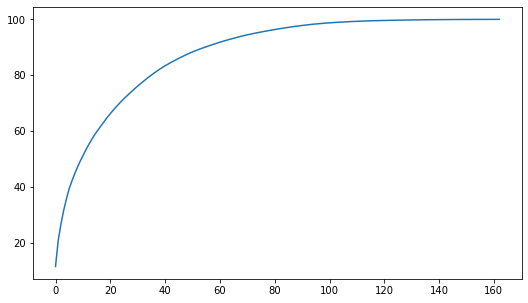

In [95]:
# To  plot feature variance

features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize=(175/20,100/20)) # 100 elements on y-axis; 175 elements on x-axis; 20 is normalising factor
plt.plot(cumulative_variance)

## Logistic Regression With PCA

In [96]:
# To import required libraries

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score

In [97]:
# Pipeline

PCA_VARS = 60
steps = [('scaler', StandardScaler()),
         ("pca", PCA(n_components=PCA_VARS)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
pipeline = Pipeline(steps)

In [98]:
from imblearn.metrics import sensitivity_specificity_support

In [99]:
# fit The model
pipeline.fit(X_train, y_train)

# To get the score on train data
pipeline.score(X_train, y_train)

0.8195259216864597

### Confusion Matrix

In [100]:
from sklearn.metrics import confusion_matrix

In [101]:
# predict on the test data
y_pred = pipeline.predict(X_test)

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# check area under curve
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[6784 1472]
 [ 130  600]]
Sensitivity: 	0.82
Specificity: 	0.82
AUC:    	 0.9


In [102]:
# class imbalance
y_train.value_counts()/y_train.shape

0    0.918777
1    0.081223
Name: churn, dtype: float64

In [103]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [104]:
# PCA
pca = PCA()

# logistic regression - the class weight is used to handle class imbalance - it adjusts the cost function
logistic = LogisticRegression(class_weight={0:0.1, 1: 0.9})

# create pipeline
steps = [("scaler", StandardScaler()), 
         ("pca", pca),
         ("logistic", logistic)
        ]

# pipeline
pca_logistic = Pipeline(steps)

# hyperparameter
params = {'pca__n_components': [60, 80], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [105]:
# fit the model
model.fit(X_train, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2'],
                         'pca__n_components': [60, 80]},
             scoring='roc_auc', verbose=1)

In [106]:
pd.DataFrame(model.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_logistic__C,param_logistic__penalty,param_pca__n_components,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.028074,0.049793,0.000000,0.000000,0.1,l1,60,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
1,2.768525,0.018217,0.000000,0.000000,0.1,l1,80,"{'logistic__C': 0.1, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
2,2.637575,0.082839,0.068735,0.012498,0.1,l2,60,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.897742,0.903558,0.892887,0.885827,0.892060,0.894415,0.005938,16
3,3.487993,0.100949,0.059361,0.006251,0.1,l2,80,"{'logistic__C': 0.1, 'logistic__penalty': 'l2'...",0.899783,0.905957,0.896702,0.892774,0.898351,0.898713,0.004314,3
4,2.200273,0.114703,0.000000,0.000000,0.5,l1,60,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
5,2.846645,0.040010,0.000000,0.000000,0.5,l1,80,"{'logistic__C': 0.5, 'logistic__penalty': 'l1'...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
6,2.743543,0.100562,0.062485,0.000002,0.5,l2,60,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",0.896667,0.902693,0.894000,0.887370,0.892899,0.894726,0.005004,12
7,3.650108,0.167159,0.065609,0.006250,0.5,l2,80,"{'logistic__C': 0.5, 'logistic__penalty': 'l2'...",0.899249,0.904976,0.897015,0.892996,0.898756,0.898598,0.003873,7
8,2.218841,0.022161,0.000000,0.000000,1,l1,60,"{'logistic__C': 1, 'logistic__penalty': 'l1', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,17
9,2.872084,0.106134,0.000000,0.000000,1,l1,80,"{'logistic__C': 1, 'logistic__penalty': 'l1', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,17


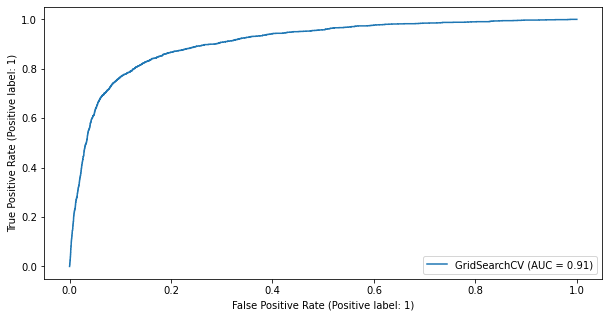

In [107]:
# Roc curve 

from sklearn.metrics import RocCurveDisplay

plt.rcParams["figure.figsize"] =(10,5)
RocCurveDisplay.from_estimator(model, X_train, y_train,drop_intermediate=False)
plt.show()

In [108]:
# To get the AUC and hyperparameters

print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.8987721082356883
Best hyperparameters:  {'logistic__C': 2, 'logistic__penalty': 'l2', 'pca__n_components': 80}


In [109]:
# predict churn on test data
y_pred = model.predict(X_test)

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')


y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[7083 1173]
 [ 144  586]]
Sensitivity: 	0.8
Specificity: 	0.86
AUC:    	 0.9


## RandomForest Classifier Model 

In [110]:
from sklearn.ensemble import RandomForestClassifier

In [111]:
# Random forest
forest = RandomForestClassifier(class_weight={0:0.1, 1: 0.9}, n_jobs = -1)

# Hyperparameter
params = {"criterion": ['gini', 'entropy'], "max_features": ['auto', 0.4]}

# creating 5 folds using StratifiedKFold

folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# model using gridsearch
model = GridSearchCV(estimator=forest, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [112]:
# Fit the model
model.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=RandomForestClassifier(class_weight={0: 0.1, 1: 0.9},
                                              n_jobs=-1),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['auto', 0.4]},
             scoring='roc_auc', verbose=1)

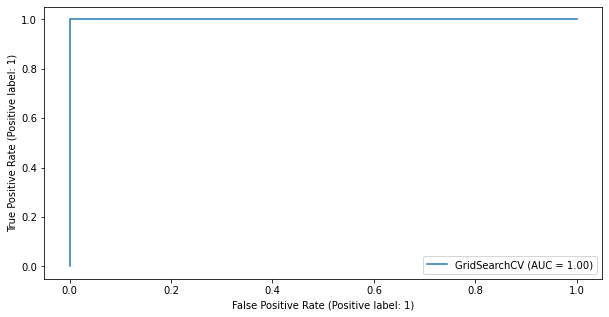

In [113]:
# Roc Curve

from sklearn.metrics import RocCurveDisplay
plt.rcParams["figure.figsize"] =(10,5)
RocCurveDisplay.from_estimator(model, X_train, y_train,drop_intermediate=False)
plt.show()

In [114]:
# To print AUC and hyperparameters

print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.9272635386039013
Best hyperparameters:  {'criterion': 'entropy', 'max_features': 0.4}


###  Confusion Matrix

In [115]:
# predict on the test data
y_pred = model.predict(X_test)

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# To get the area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[8141  115]
 [ 387  343]]
Sensitivity: 	0.47
Specificity: 	0.99
AUC:    	 0.93


In [116]:
# Random forest model on the train data

max_features = int(round(np.sqrt(X_train.shape[1])))    
print(max_features)

rf_model = RandomForestClassifier(n_estimators=100, max_features=max_features, class_weight={0:0.1, 1: 0.9}, oob_score=True, random_state=4, verbose=1)

13


In [117]:
# Fit The model

rf_model.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:   16.6s finished


RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, max_features=13,
                       oob_score=True, random_state=4, verbose=1)

In [118]:
# OOB score

rf_model.oob_score_

0.9437687795106596

In [119]:
# predict on test data
y_pred = rf_model.predict(X_test)

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

# To get the area under curve
y_pred_prob = rf_model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[[8153  103]
 [ 408  322]]
Sensitivity: 	0.44
Specificity: 	0.99
ROC:    	 0.93


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


## Feature Importance

In [120]:
# feature_importance
features = df_filtered.drop('churn', axis=1).columns

# randomforest model feature_importance
importance = rf_model.feature_importances_


feature_importance = pd.DataFrame({'variables': features, 'importance_percentage': importance*100})
feature_importance = feature_importance[['variables', 'importance_percentage']]


feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_importance.importance_percentage.sum())
feature_importance

Sum of importance= 100.00000000000001


,variables,importance_percentage
0,loc_ic_t2m_mou_8,5.342683
1,loc_ic_mou_8,4.774229
2,total_ic_mou_8,3.956706
3,loc_ic_t2t_mou_8,3.825654
4,loc_og_t2m_mou_8,3.006992
5,loc_og_mou_8,2.837594
6,arpu_diff,2.718836
7,total_rech_amt_8,2.565569
8,last_day_rch_amt_8,2.260393
9,arpu_8,2.189833


### Correlation Matrix

In [121]:
# extract top 'n' features

top_n = 30
top_features = feature_importance.variables[0:top_n]

<AxesSubplot:>

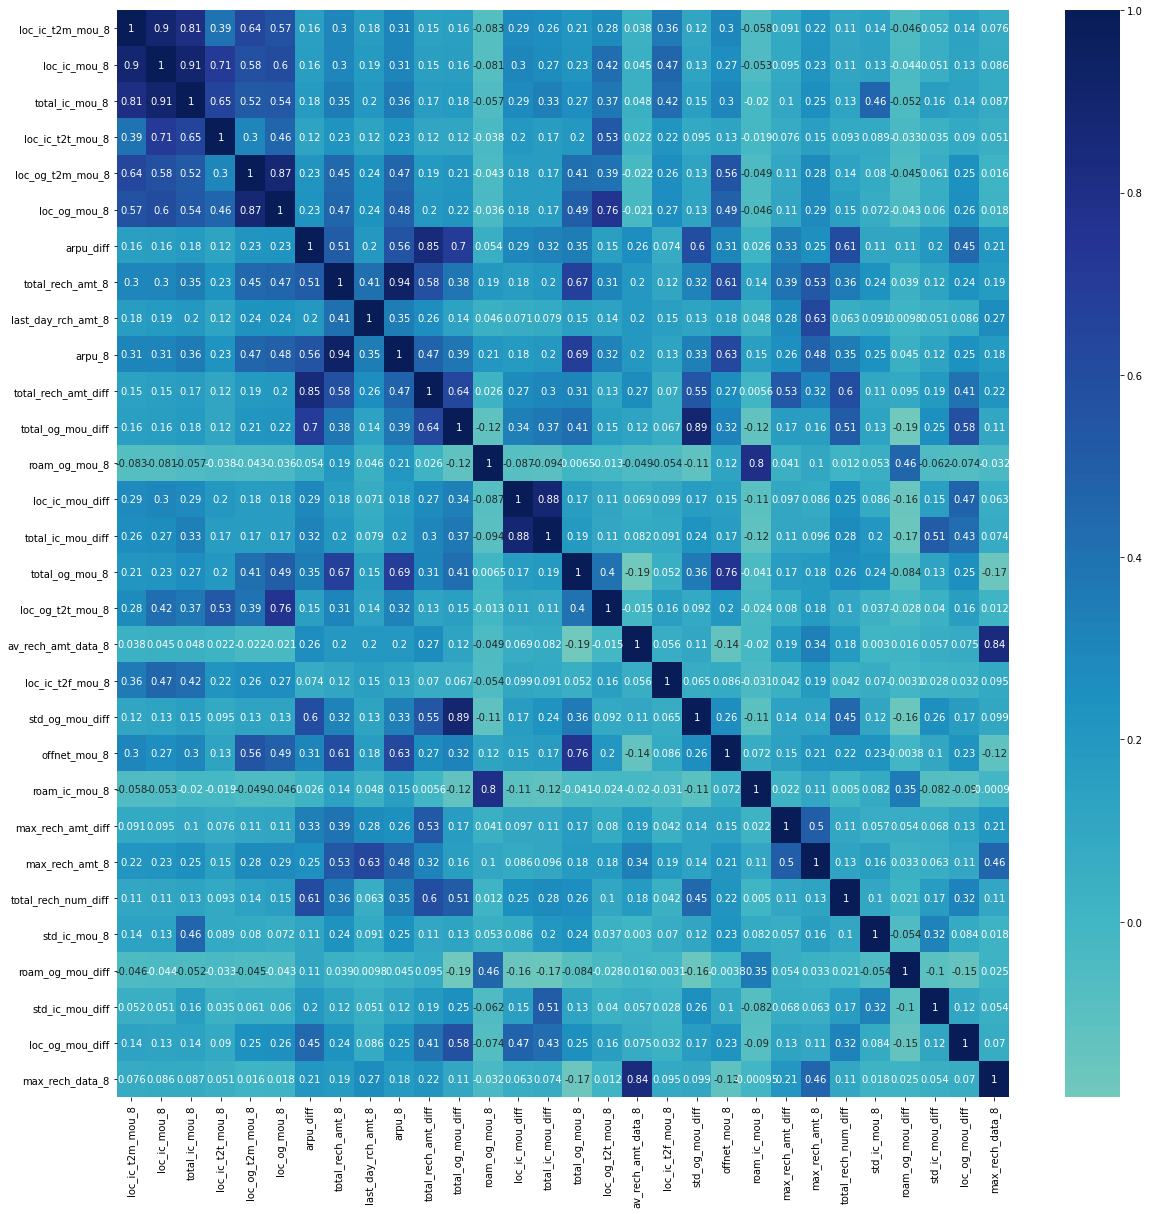

In [122]:
# To plot feature correlation

import seaborn as sns
plt.rcParams["figure.figsize"] =(20,20)
mycmap = sns.diverging_palette(199, 359, s=99, center="light", as_cmap=True)
sns.heatmap(data=X_train[top_features].corr(), center=0.0, cmap="YlGnBu",annot=True)

In [123]:
top_features = ['total_ic_mou_8', 'total_rech_amt_diff', 'total_og_mou_8', 'arpu_8', 'roam_ic_mou_8', 'roam_og_mou_8', 
                'std_ic_mou_8', 'av_rech_amt_data_8', 'std_og_mou_8']
X_train = X_train[top_features]
X_test = X_test[top_features]

In [124]:
# logistic regression
steps = [('scaler', StandardScaler()), 
         ("logistic", LogisticRegression(class_weight={0:0.1, 1:0.9}))
        ]

# compile pipeline
logistic = Pipeline(steps)

# hyperparameter space StratifiedKFold
params = {'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# To create 5 folds using 
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# model using gridsearch 
model = GridSearchCV(estimator=logistic, cv=folds, param_grid=params, scoring='roc_auc', n_jobs=-1, verbose=1)

In [125]:
# fit the model
model.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic',
                                        LogisticRegression(class_weight={0: 0.1,
                                                                         1: 0.9}))]),
             n_jobs=-1,
             param_grid={'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10],
                         'logistic__penalty': ['l1', 'l2']},
             scoring='roc_auc', verbose=1)

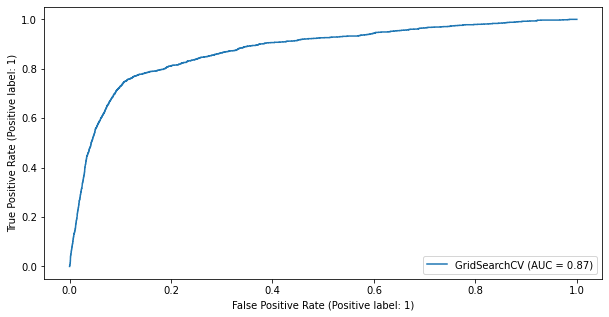

In [126]:
# Roc curve

from sklearn.metrics import RocCurveDisplay
plt.rcParams["figure.figsize"] =(10,5)
RocCurveDisplay.from_estimator(model, X_train, y_train,drop_intermediate=False)
plt.show()

In [127]:
# hyperparameters
print("Best AUC: ", model.best_score_)
print("Best hyperparameters: ", model.best_params_)

Best AUC:  0.8732722602061866
Best hyperparameters:  {'logistic__C': 10, 'logistic__penalty': 'l2'}


In [128]:
# predict on test data
y_pred = model.predict(X_test)

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

# check sensitivity and specificity
sensitivity, specificity, _ = sensitivity_specificity_support(y_test, y_pred, average='binary')
print("Sensitivity: \t", round(sensitivity, 2), "\n", "Specificity: \t", round(specificity, 2), sep='')

y_pred_prob = model.predict_proba(X_test)[:, 1]
print("ROC:    \t", round(roc_auc_score(y_test, y_pred_prob),2))

[[6937 1319]
 [ 144  586]]
Sensitivity: 	0.8
Specificity: 	0.84
ROC:    	 0.88


### To get the intercept value

In [129]:
logistic_model = model.best_estimator_.named_steps['logistic']

In [130]:
# To get the intercept
intercept_df = pd.DataFrame(logistic_model.intercept_.reshape((1,1)), columns = ['intercept'])

### To Get the Coefficients

In [131]:
# coefficients
coefficients = logistic_model.coef_.reshape((9, 1)).tolist()
coefficients = [val for sublist in coefficients for val in sublist]
coefficients = [round(coefficient, 3) for coefficient in coefficients]

logistic_features = list(X_train.columns)
coefficients_df = pd.DataFrame(logistic_model.coef_, columns=logistic_features)

In [132]:
# concatenate dataframes
coefficients = pd.concat([intercept_df, coefficients_df], axis=1).T

In [133]:
coefficients.columns=["Attr"]

# Important Predictor Attributes

In [134]:
# Feature coefficients

coefficients

,Attr
intercept,-1.515791
total_ic_mou_8,-1.133135
total_rech_amt_diff,-0.707501
total_og_mou_8,-1.531590
arpu_8,0.226722
roam_ic_mou_8,-0.024287
roam_og_mou_8,0.206212
std_ic_mou_8,0.053063
av_rech_amt_data_8,-0.781270
std_og_mou_8,0.948640


# Plot of the Attributes

<AxesSubplot:>

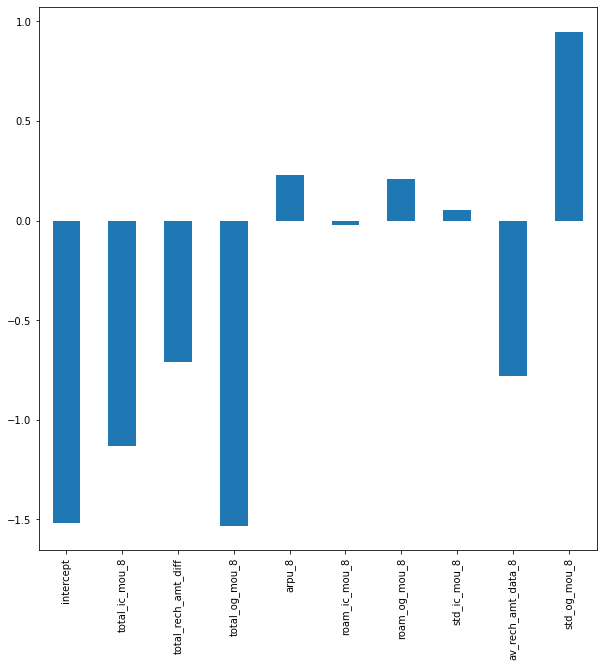

In [135]:
# Final PLOT of features

plt.rcParams["figure.figsize"] =(10,10)
coefficients['Attr'].plot.bar()

# Important Predictor Attributes

 ### intercept	:  -1.515791
### total_ic_mou_8	: -1.133135
### total_rech_amt_diff :  -0.707501
### total_og_mou_8	: -1.531590
### arpu_8 :	0.226722
### roam_ic_mou_8 : -0.024287
### roam_og_mou_8 :0.206212
### std_ic_mou_8	: 0.053063
### #av_rech_amt_data_8	: -0.781270
### std_og_mou_8	: 0.948640

# Business Insights

## Recommended Strategies 

### The Churn is Positively affected by STD incoming and outgoing - The Telecom Company can focus on the STD rates to retain the customers.
### The Roaming Outgoing positively affects the model. The Telecom Company can provide attrative rates and offers to Roaming customers.
### To Retain the Customers the Telecom Company can reduce in incoming and outgoing rates, as it negatively affects the model
### The Telecom Company can also reach out to the customers to gain Information and Grievance from them about the services. This input can be further used to improve and give them personalized service.